In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [135]:
import sys
sys.path.append('../')
from spectro_data.test_apogeetgas import load_and_match as load_apogeetgas

Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda0: GeForce GT 720 (0000:01:00.0)
/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
lamost = pd.read_hdf('/data/jls/GaiaDR2/spectro/LAMOST_input.hdf5')

In [7]:
apogee = pd.read_hdf('/data/jls/GaiaDR2/spectro/APOGEE_input.hdf5')

In [98]:
rave = pd.read_hdf('/data/jls/GaiaDR2/spectro/RAVE_input.hdf5')

In [123]:
ges = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_input.hdf5')

In [124]:
galah = pd.read_hdf('/data/jls/GaiaDR2/spectro/GALAH_input.hdf5')

(-1.0, 5.0)

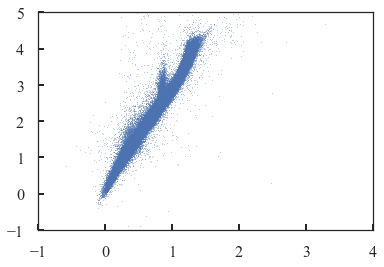

In [179]:
plt.plot(rave['J']-rave['K'], rave['G']-rave['H'], '.', ms=1);
# plt.plot(a['J']-a['K'], a['G']-a['H'], '.', ms=1);
plt.xlim(-1.,4.)
plt.ylim(-1.,5.)

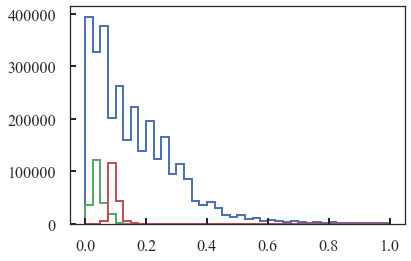

In [161]:
plt.hist(lamost.e_fe_h,histtype='step',lw=2,range=[0.,1.],bins=40)
plt.hist(apogee.e_fe_h,histtype='step',lw=2,range=[0.,1.],bins=40);
plt.hist(rave.e_fe_h,histtype='step',lw=2,range=[0.,1.],bins=40);

In [102]:
from astropy.coordinates import match_coordinates_sky, SkyCoord
import astropy.units as u
ap_c = SkyCoord(ra=apogee.ra.values*u.deg, dec=apogee.dec.values*u.deg)
ra_c = SkyCoord(ra=rave.ra.values*u.deg, dec=rave.dec.values*u.deg)
la_c = SkyCoord(ra=lamost.ra.values*u.deg, dec=lamost.dec.values*u.deg)
c, d2, d3 = ap_c.match_to_catalog_sky(la_c)

In [104]:
c2, d22, d32 = la_c.match_to_catalog_sky(ra_c)

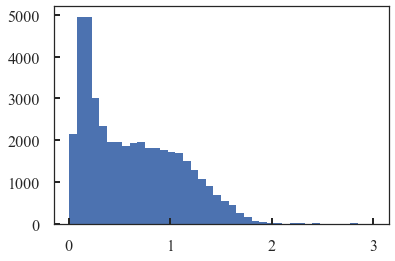

In [31]:
plt.hist(d2.arcsec,bins=40,range=[0.,3.]);

In [70]:
apogee_cm = apogee[d2<2.*u.arcsec].reset_index(drop=True)
lamost_cm = lamost.iloc[c][d2<2.*u.arcsec].reset_index(drop=True)

In [105]:
rave_cm = rave.iloc[c2][d22<2.*u.arcsec].reset_index(drop=True)
lamost_rave_cm = lamost[d22<2.*u.arcsec].reset_index(drop=True)

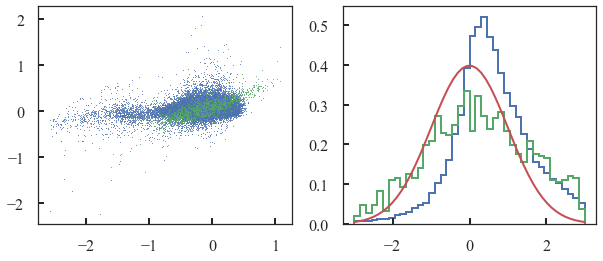

In [114]:
f,a=plt.subplots(1,2,figsize=[10.,4.]);
plt.sca(a[0])
plt.plot(apogee_cm.fe_h.values,(apogee_cm.fe_h-lamost_cm.fe_h).values,'.', ms=2)
plt.plot(rave_cm.fe_h.values,(rave_cm.fe_h-lamost_rave_cm.fe_h).values,'.', ms=2)
plt.sca(a[1])
plt.hist((apogee_cm.fe_h-lamost_cm.fe_h)/np.sqrt(apogee_cm.e_fe_h**2+lamost_cm.e_fe_h**2),
         range=[-3.,3.],bins=40, normed=True, histtype='step', lw=2);
plt.hist((rave_cm.fe_h-lamost_rave_cm.fe_h)/np.sqrt(rave_cm.e_fe_h**2+lamost_rave_cm.e_fe_h**2),
         range=[-3.,3.],bins=40, normed=True, histtype='step', lw=2);
xx = np.linspace(-3.,3.)
plt.plot(xx,np.exp(-xx**2/2.)/np.sqrt(2.*np.pi))

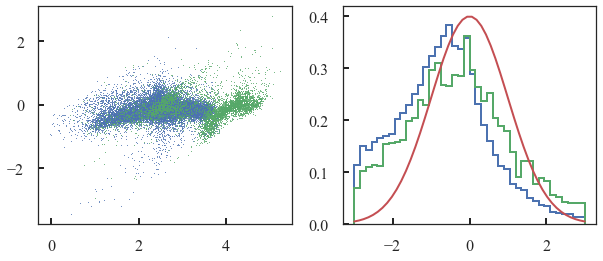

In [112]:
f,a=plt.subplots(1,2,figsize=[10.,4.]);
plt.sca(a[0])
plt.plot(apogee_cm.logg.values,(apogee_cm.logg-lamost_cm.logg).values,'.', ms=2)
plt.plot(rave_cm.logg.values,(rave_cm.logg-lamost_rave_cm.logg).values,'.', ms=2)
plt.sca(a[1])
plt.hist((apogee_cm.logg-lamost_cm.logg)/np.sqrt(apogee_cm.e_logg**2+lamost_cm.e_logg**2),
         range=[-3.,3.],bins=40, normed=True, histtype='step', lw=2);
plt.hist((rave_cm.logg-lamost_rave_cm.logg)/np.sqrt(rave_cm.e_logg**2+lamost_rave_cm.e_logg**2),
         range=[-3.,3.],bins=40, normed=True, histtype='step', lw=2);
xx = np.linspace(-3.,3.)
plt.plot(xx,np.exp(-xx**2/2.)/np.sqrt(2.*np.pi))

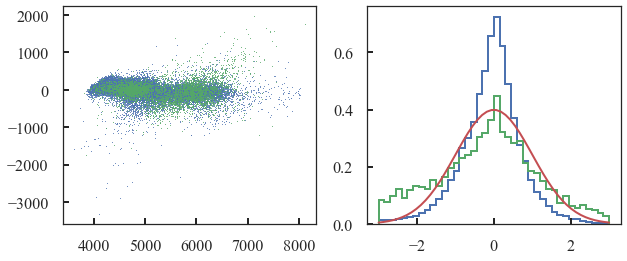

In [115]:
f,a=plt.subplots(1,2,figsize=[10.,4.]);
plt.sca(a[0])
plt.plot(apogee_cm.teff.values,(apogee_cm.teff-lamost_cm.teff).values,'.', ms=2)
plt.plot(rave_cm.teff.values,(rave_cm.teff-lamost_rave_cm.teff).values,'.', ms=2)
plt.sca(a[1])
plt.hist((apogee_cm.teff-lamost_cm.teff)/np.sqrt(apogee_cm.e_teff**2+lamost_cm.e_teff**2),
         range=[-3.,3.],bins=40, normed=True, histtype='step', lw=2);
plt.hist((rave_cm.teff-lamost_rave_cm.teff)/np.sqrt(rave_cm.e_teff**2+lamost_rave_cm.e_teff**2),
         range=[-3.,3.],bins=40, normed=True, histtype='step', lw=2);
xx = np.linspace(-3.,3.)
plt.plot(xx,np.exp(-xx**2/2.)/np.sqrt(2.*np.pi))

(3000.0, 10000.0)

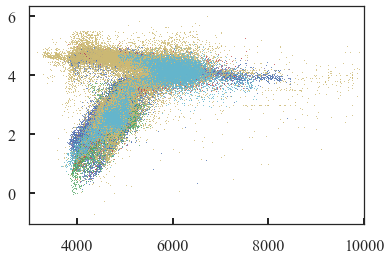

In [129]:
plt.plot(lamost_cm.teff,lamost_cm.logg,'.',ms=2)
plt.plot(apogee_cm.teff,apogee_cm.logg,'.',ms=2)
plt.plot(rave_cm.teff,rave_cm.logg,'.',ms=2)
plt.plot(lamost_rave_cm.teff,lamost_rave_cm.logg,'.',ms=2)
plt.plot(ges.teff,ges.logg,'.',ms=2)
plt.plot(galah.teff,galah.logg,'.',ms=2)
plt.xlim(3000.,10000.)

In [86]:
f = apogee.sample(10,random_state=52).reset_index(drop=True)

In [87]:
len(f)

10

(-90.0, 90.0)

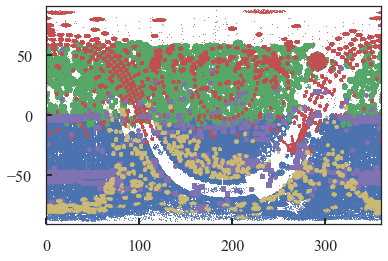

In [132]:
plt.plot(rave.ra,rave.dec,'.',ms=2)
plt.plot(lamost.ra,lamost.dec,'.',ms=2)
plt.plot(apogee.ra,apogee.dec,'.',ms=2)
plt.plot(ges.ra,ges.dec,'.',ms=10)
plt.plot(galah.ra,galah.dec,'.',ms=5)
plt.xlim(0.,360.)
plt.ylim(-90.,90.)